In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift
import seaborn as sns
sns.set(style="ticks",font="times",font_scale=1.4)

# Parameters
wavelength = 800e-9  # green light, 550 nm
f_number = 1  # F-number of the optical system
diameter = 1  # diameter of the aperture in meters
focal_length = f_number * diameter  # focal length derived from F-number and aperture diameter

# Sampling
sampling_size = 1024  # number of samples in each dimension
pupil_plane_size = diameter*3  # size of the pupil plane in meters
focal_plane_size = wavelength * focal_length / pupil_plane_size  # size of the focal plane in meters

# Define the spatial axes for the pupil plane
x_pupil = np.linspace(-pupil_plane_size / 2, pupil_plane_size / 2, sampling_size)
y_pupil = np.linspace(-pupil_plane_size / 2, pupil_plane_size / 2, sampling_size)
xx_pupil, yy_pupil = np.meshgrid(x_pupil, y_pupil)

In [17]:
def calc_log_intensity(aperture):
    # Perform the FFT to find the focal plane field
    focal_plane_field = fftshift(fft2(aperture))
    # Calculate the intensity in the focal plane
    intensity_focal_plane = np.abs(focal_plane_field)**2
    # Convert intensity to logarithmic scale
    log_intensity_focal_plane = np.log10(intensity_focal_plane + 1)  # Added 1 to avoid log(0)
    return log_intensity_focal_plane
    

# Define the circular aperture
circle = ((xx_pupil**2 + yy_pupil**2) <= (diameter / 2)**2)#|(((xx_pupil-1)**2 + (yy_pupil)**2) <= (diameter / 2)**2)
log_intens_circ = calc_log_intensity(circle)

circ_obs = ((xx_pupil**2 + yy_pupil**2) <= (diameter / 2)**2)&((xx_pupil**2 + yy_pupil**2) >= (0.4*diameter / 2)**2)
log_intens_circ_obs = calc_log_intensity(circ_obs)
square = (np.abs(xx_pupil) <= diameter / 2)&(np.abs(yy_pupil) <= diameter / 2)
log_intens_square = calc_log_intensity(square)

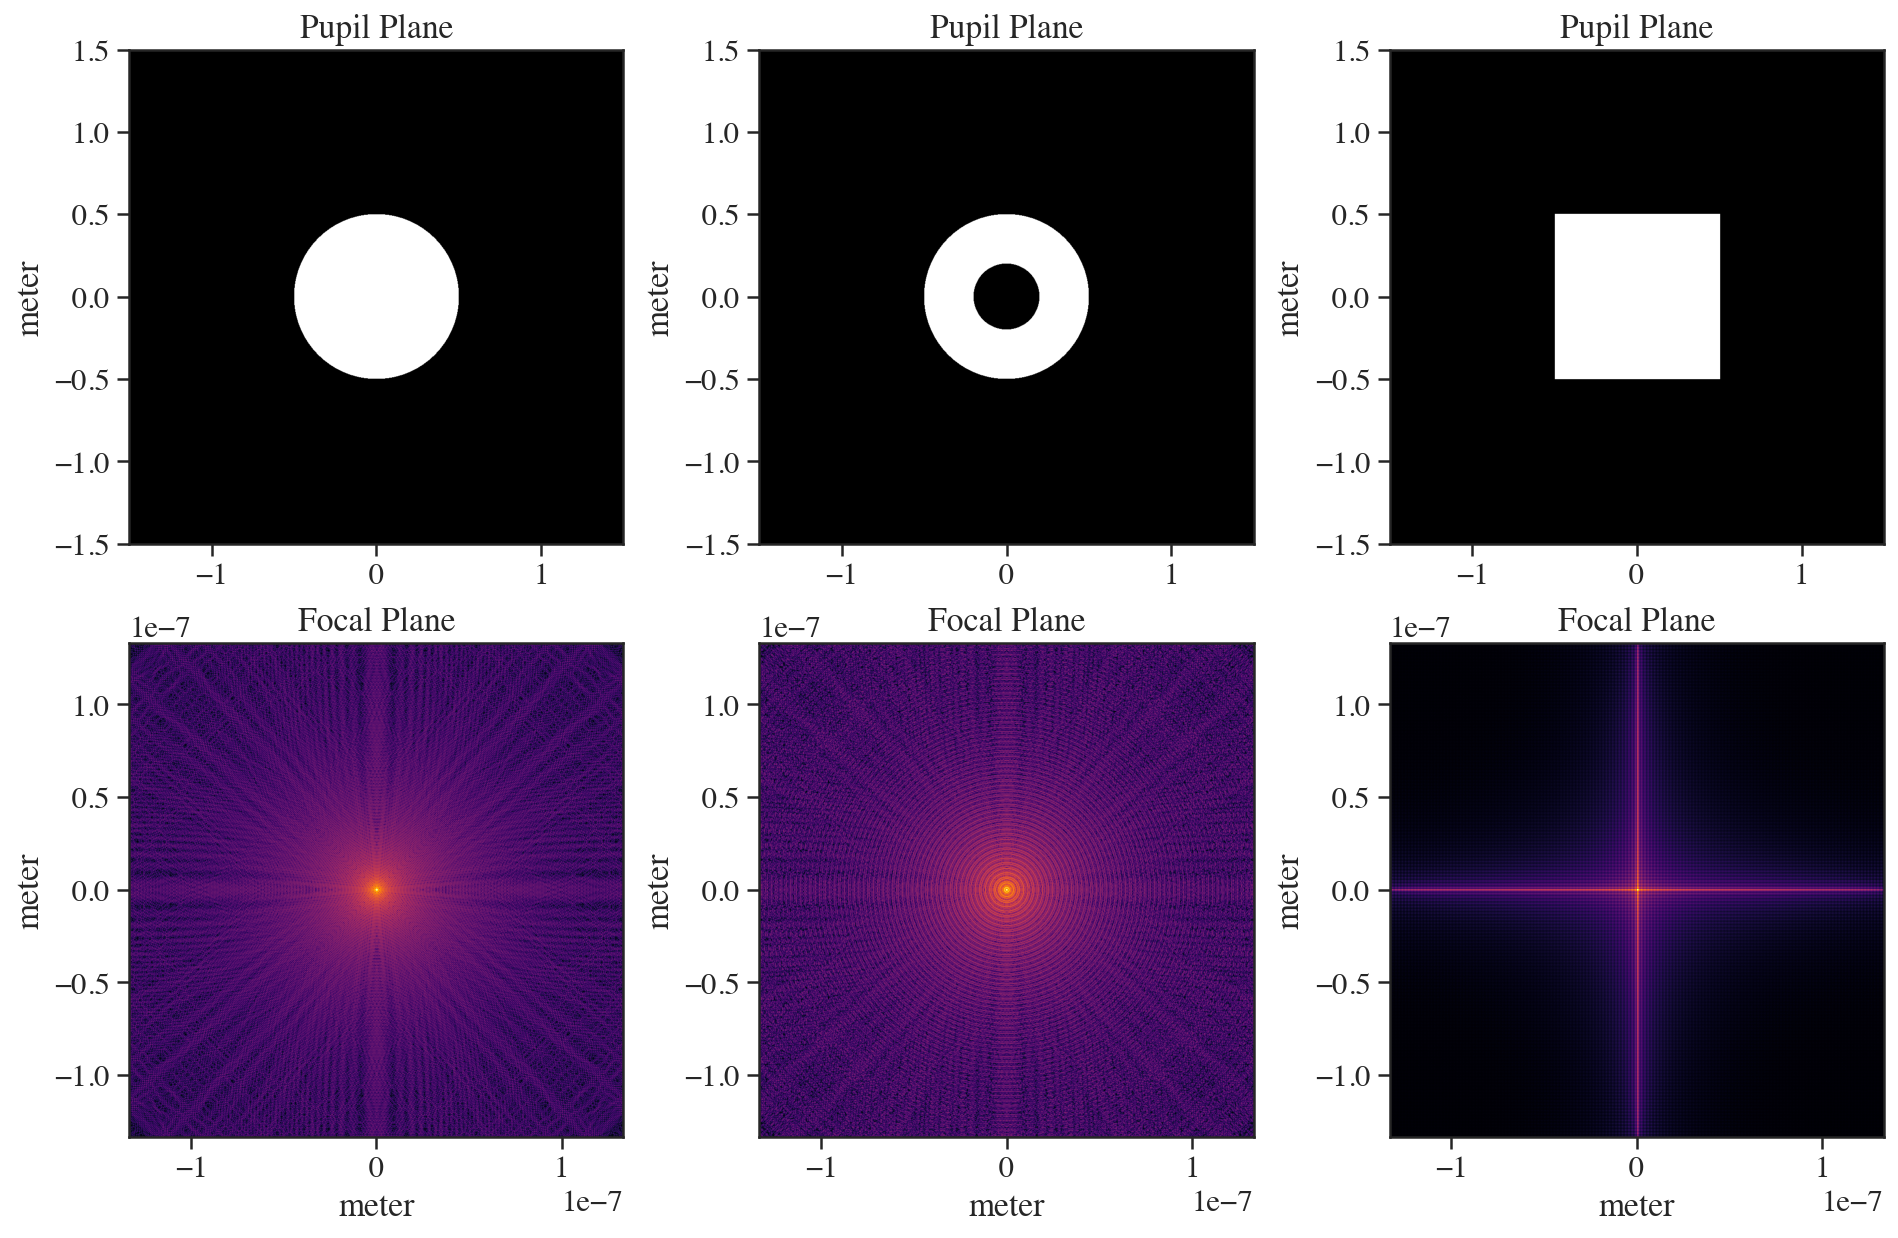

In [18]:
fig,ax=plt.subplots(2,3,figsize=(16,10))
ax[0,0].imshow(circle, cmap='gray', extent=[-pupil_plane_size/2, pupil_plane_size/2, -pupil_plane_size/2, pupil_plane_size/2])
ax[1,0].imshow(log_intens_circ, cmap='inferno', extent=[-focal_plane_size/2, focal_plane_size/2, -focal_plane_size/2, focal_plane_size/2])
ax[0,1].imshow(circ_obs, cmap='gray', extent=[-pupil_plane_size/2, pupil_plane_size/2, -pupil_plane_size/2, pupil_plane_size/2])
ax[1,1].imshow(log_intens_circ_obs, cmap='inferno', extent=[-focal_plane_size/2, focal_plane_size/2, -focal_plane_size/2, focal_plane_size/2])
ax[0,2].imshow(square, cmap='gray', extent=[-pupil_plane_size/2, pupil_plane_size/2, -pupil_plane_size/2, pupil_plane_size/2])
ax[1,2].imshow(log_intens_square, cmap='inferno', extent=[-focal_plane_size/2, focal_plane_size/2, -focal_plane_size/2, focal_plane_size/2])

for i in range(3):
    ax[0,i].set_title("Pupil Plane")
    ax[1,i].set_title("Focal Plane")
    ax[0,i].set_ylabel("meter")
    ax[1,i].set_xlabel("meter")
    ax[1,i].set_ylabel("meter")